In [1]:
pip install pandas matplotlib seaborn wordcloud


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
df = pd.read_csv('netflix_titles.csv')

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [11]:
df['type'].unique()  # Movie, TV Show
df['country'].unique()
df['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

In [13]:
genres = df['listed_in'].str.split(',').explode().str.strip()
genre_counts = genres.value_counts()

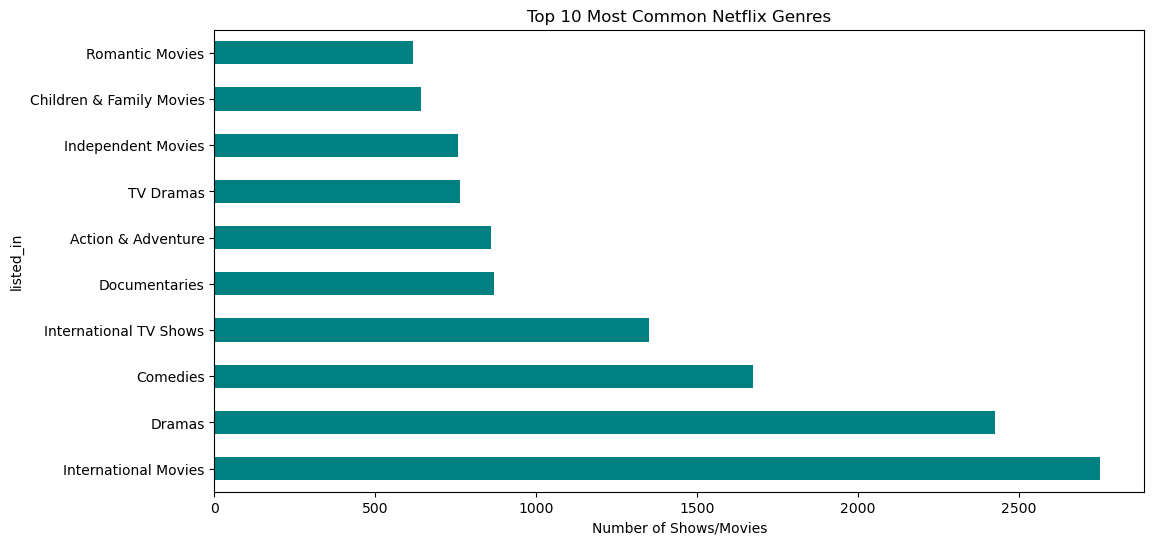

In [15]:
plt.figure(figsize=(12, 6))
genre_counts.head(10).plot(kind='barh', color='teal')
plt.title('Top 10 Most Common Netflix Genres')
plt.xlabel('Number of Shows/Movies')
plt.show()

In [17]:
country_counts = df['country'].value_counts().head(10)

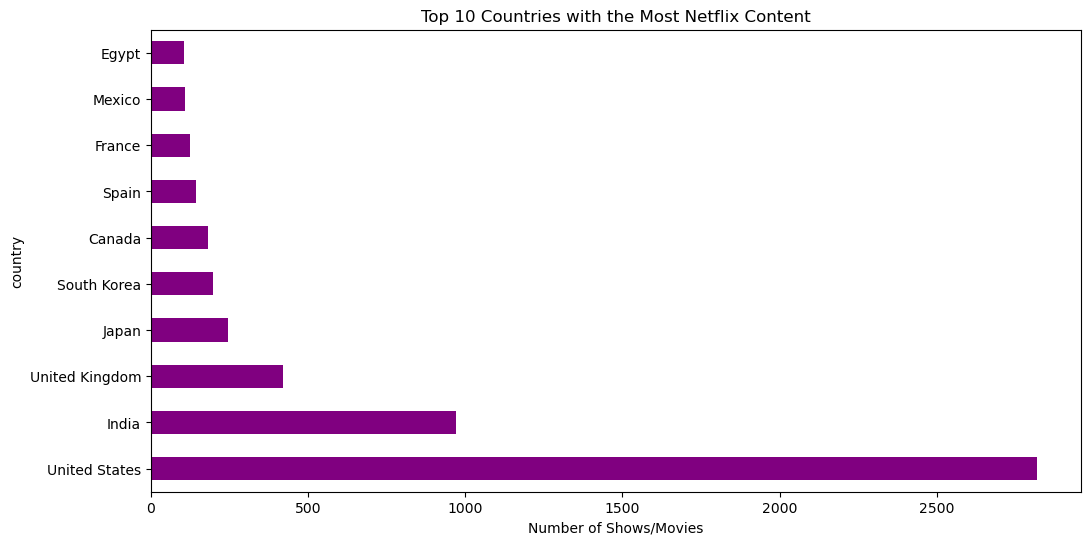

In [19]:
plt.figure(figsize=(12, 6))
country_counts.plot(kind='barh', color='purple')
plt.title('Top 10 Countries with the Most Netflix Content')
plt.xlabel('Number of Shows/Movies')
plt.show()

In [21]:
yearly_releases = df.groupby('release_year')['title'].count()

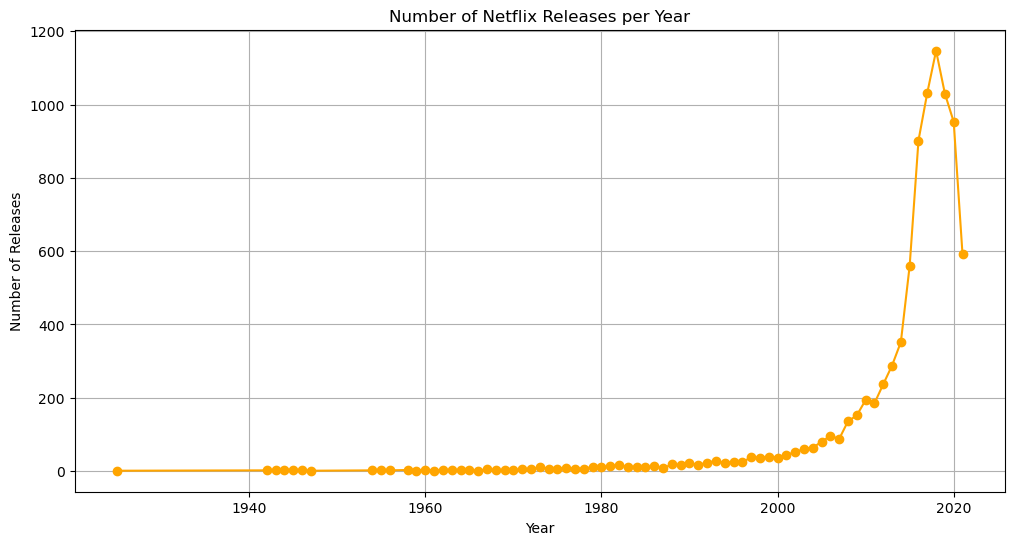

In [23]:
plt.figure(figsize=(12, 6))
yearly_releases.plot(kind='line', marker='o', color='orange')
plt.title('Number of Netflix Releases per Year')
plt.ylabel('Number of Releases')
plt.xlabel('Year')
plt.grid(True)
plt.show()

In [25]:
text = ' '.join(df['description'].dropna())

In [27]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

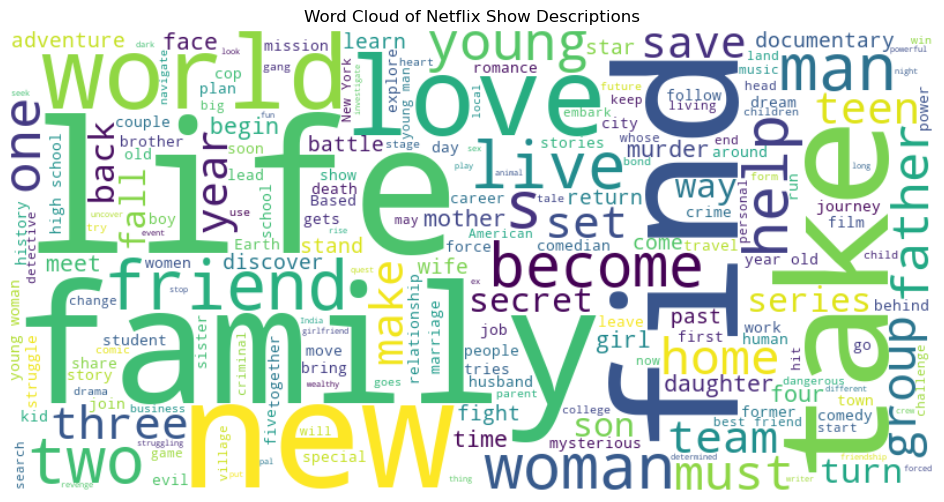

In [29]:
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Netflix Show Descriptions')
plt.show()

In [31]:
content_type_counts = df['type'].value_counts()

C:\Users\Chhavi\AppData\Local\Temp\ipykernel_7380\2918197386.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='coolwarm')


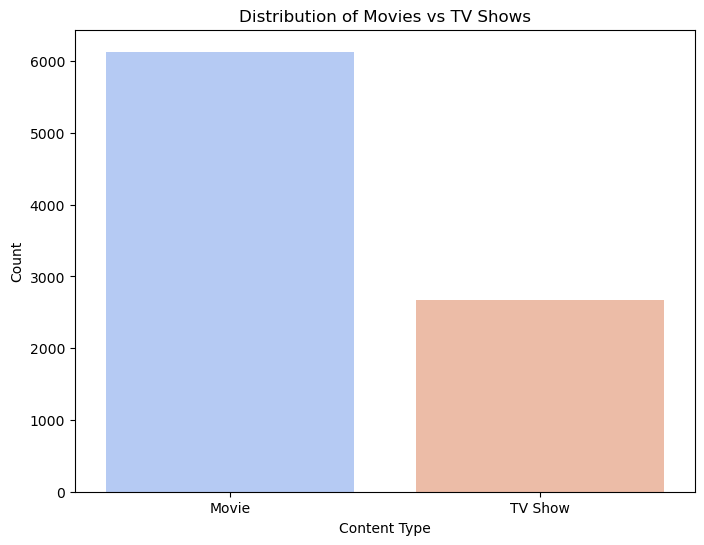

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='type', palette='coolwarm')
plt.title('Distribution of Movies vs TV Shows')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

In [35]:
df.to_csv('cleaned_netflix_data.csv', index=False)

In [37]:
wordcloud.to_file('wordcloud_netflix.png')